# TTT4185 Machine learning for Speech technology

## Voluntary computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful commands include `matplotlib.pyplot.plot`.

### Problem 1

In this problem we will look at a speech signal and do simple spectral analysis on the signal.

(a) Download the speech file `stry.wav` from Blackboard and load the file using `scipy.io.wavefile.read`. The speech represents the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.
- Plot the signal.
- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?
- Take a 40 millisecond subset of the vowel /iy/ and plot it.
- Find the fundamental frequency $F_0$ of the vowel.


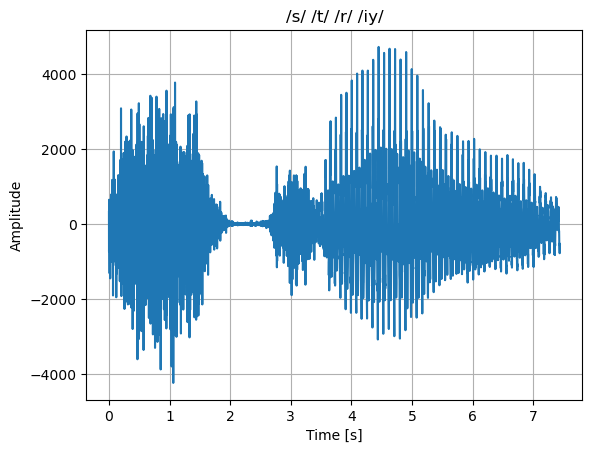

In [1]:
import scipy.io.wavfile
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
   
Fs, data = scipy.io.wavfile.read('stry.wav')
x = np.linspace(0, len(data)/Fs, len(data))

plt.plot(x, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.title('/s/ /t/ /r/ /iy/')
plt.show()


1a)

#Characteristics of the sounds /s/, /t/, /r/ and /iy/.

The consonants are characterised by how they are articulated. The consonant sounds are formed when there is a constriction in the throat or obstructions in the mouth. 

/s/ is a consonant and more specific an alveolar, voiceless fricative. It is formed by pressing the tongue towards the front in the upper front part of the mouth cavity, the alveolar part. This gives it a the characteristic noisy signal.

/t/ is an alveolar, voiceless plosive and formed in the same manner as /s/. From the waveform we can see that the waveform of the sound is showing a stop in the aspiration, a silence, before it bursts out, removing the oral closure which is formed by the tongue (in this case). 

/r/  is an alveolar, voiced retroflex, and is formed in the same manner as the other alveolars except for the voicing of the sound and the shape of the tounge. A retroflex sound will be made by curling the tounge backwards in the mouth cavity. And since it is voiced it will create more energy, as we can see from the waveform. 

The vowels are articulated without major constriction or obstruction of the airflow during the articulation of a vowel. It is the variation of tongue placement that distinguishes and gives the vowels different characteristics. The fundamental frequency is generated when the energy from the articulation is entering the pharyngeal and oral cavities. The first(F1) and second(F2) formants of a vowel are the major resonance of the oral and pharyngael cavities. F1 corresponds too the vibration made further back in the cavity, in general the pharyngael part. Whereas F2 will correspond to the shape of the oral portion deicded by how the tongue is extruded. 

/iy/ is a vowel and is therefore voiced. It is formed in the upper front part of the mouth cavity and it is tense. All voiced sounds have more energy than unvoiced and the waveform is showing exactly this. 

Fundamental frequency of the vowel. 
Fundamental frequency can be calculated by taking the number of periods and divide it by T. In this case the number of periods are 7, and T = 0.038. Which gives a Fundamental frequency of approximately 184 Hz. 

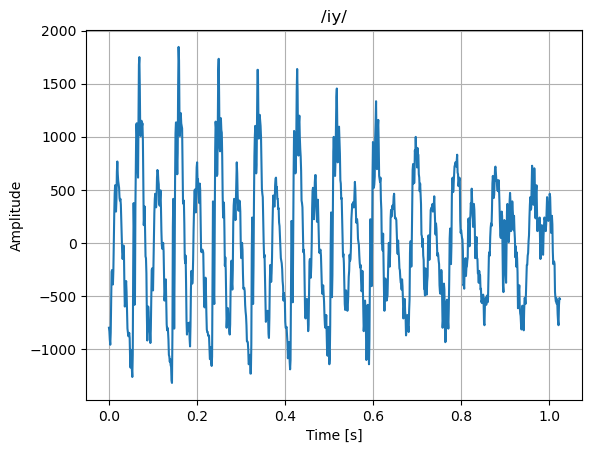

In [2]:
sample_iy = data[-1024:]

x_iy = np.linspace(0, len(sample_iy)/Fs, len(sample_iy))

plt.plot(x_iy, sample_iy)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('/iy/')
plt.grid()
plt.show()


(b) Spectral analysis
- Estimate the spectrum of the vowel using an FFT of length 1024. Plot the log-spectrum as a function of frequency
- Multiply the signal by a Hamming window and repeat the last operation.
- Explain the difference between the two spectra.
- Estimate the fundamental frequency $F_0$ using the spectrum, and compare the result to what you got in 1a)
- Roughly estimate the two first formant frequencies.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`, `scipy.signal.hamming`.

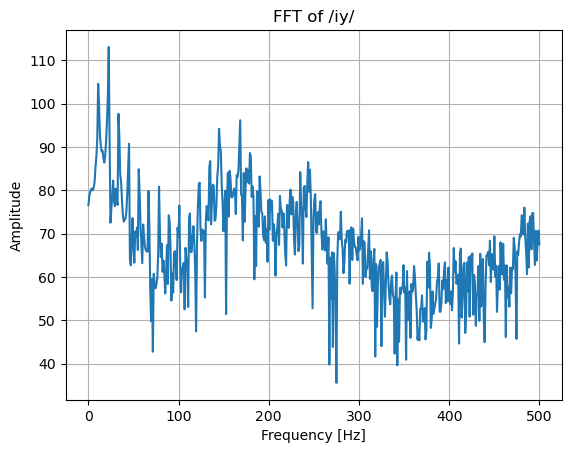

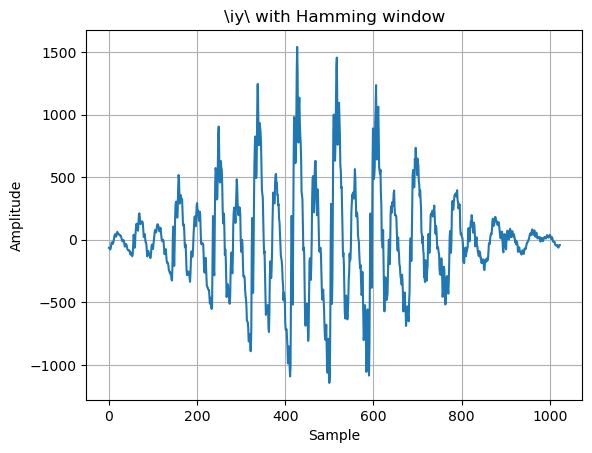

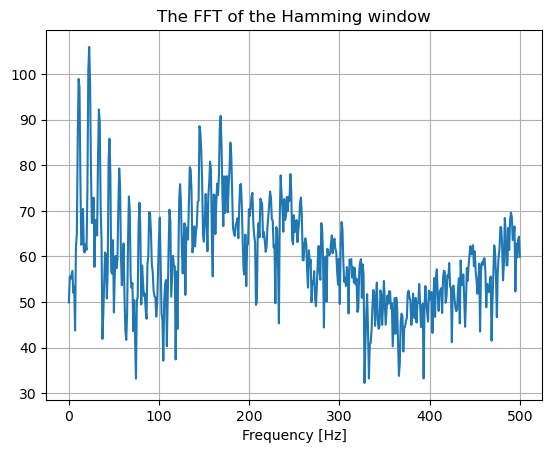

In [3]:
from scipy import signal
from scipy.signal import find_peaks

#taking the FFT of the signal /iy/
FFT_iy = np.fft.fft(sample_iy, n=1024)

N = int(len(FFT_iy)/2)


#defining the x-axis
FFT_x = np.linspace(0,(Fs/2),N)

#taking the logarithm of the FFT signal of /iy/
log_FFT_iy = np.abs(20*np.log10(FFT_iy[:N]))


#The plot of the FFT of the signal \iy\
plt.plot(FFT_x,log_FFT_iy)
plt.title('The FFT of signal \iy\ ')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.title('FFT of /iy/')
plt.show()

#Adding Hamming window of the signal \iy\.
window = signal.hamming(len(sample_iy))*sample_iy
plt.plot(window) 
plt.title('\iy\ with Hamming window')
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.grid()
plt.show()

#The FFT of the Hamming window of the signal \iy\.
FFT_window = np.fft.fft(window) #taking the FFT of the Hamming window of the signal \iy\
FFT_log_window = np.abs(20*np.log10(np.abs(FFT_window[:N]))) #taking the logarithm of the FFT window. 
plt.title('The FFT of the Hamming window')
plt.xlabel('Frequency [Hz]') 
plt.plot(FFT_x, FFT_log_window)
plt.grid()
plt.show()



1b)

The difference between the two spectra is that the first spectrum is generated by the Fourier Transform. The other spectrum is generated by using a Hamming Window. When using Fourier transformation the assumption is made that the transform is based on a finite set of data. The transform will assume that the signal is periodic with an integer number of periods. However this is not the case for many signals. So a Fourier transformed signal will often give a mispresentation of the original signal, where the transform may contain discontinuous high frequencies not originally in the signal. This is called spectral leakage and is caused by an amplitude of one harmonic leaking over to the others and will effectively give a somewhat mispresentation of the original signal. A Hamming Window will attenuate this effect by reducing the effect of the discontinuities by being zero-valued outside the chosen interval. Thus the signal, when using a Hamming window, should have less spectra leakage.    

Estimate the fundamental frequency  𝐹0  using the spectrum, and compare the result to what you got in 1a)
Roughly estimate the two first formant frequencies.

Finding the fundamental frequency 𝐹0 using the spectrum.

By roughly estimating the first and second formant. I find that the first formant, F1, is roughly at 25 Hz, whereas the second formant, F2, can be found at roughly at 175 Hz. The fundamental frequency F0 can be found at approximately 10 Hz. This is quite far off from what i found i 1a) so I am wondering if my x-axis is off, but I have not been able to figure out how this could have happened. 




(c) AR modeling
- Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.
- Estimate the spectrum for each of the model orders. Plot the log-spectrum as a function of frequency.
- Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
- Why is it impossible to estimate the fundamental frequency based on the LP model?

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`.

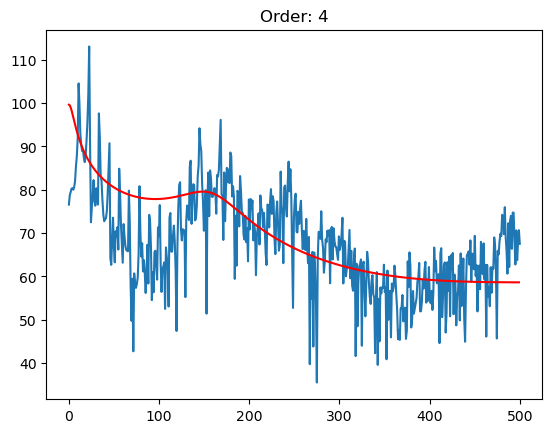

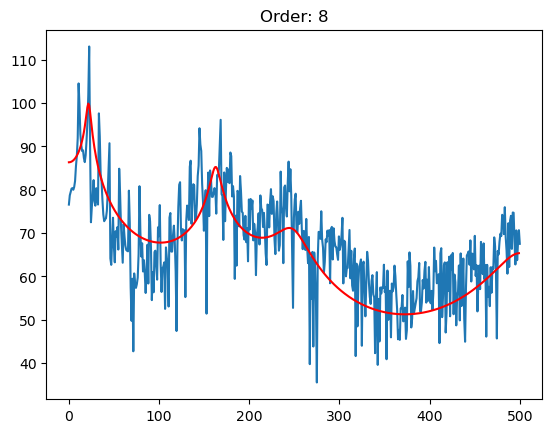

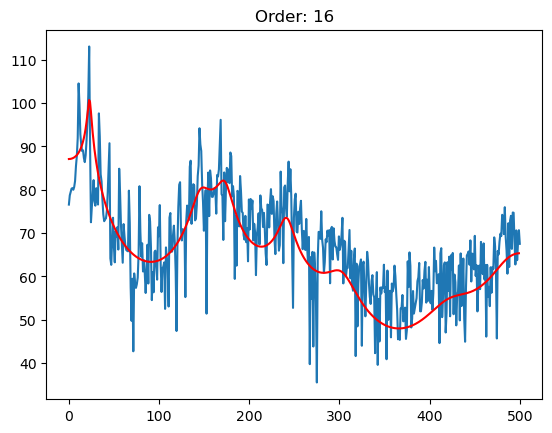

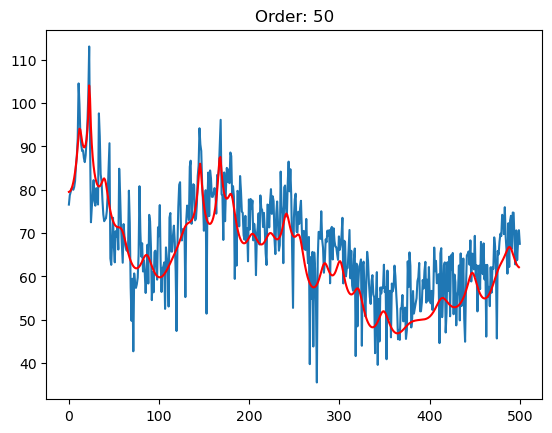

In [4]:
import pysptk 

#computing the coefficients of an AR model with order 4, 8, 16 and 50, based on the wovel. 
for k in (4, 8, 16, 50):
    coeff_ar = pysptk.sptk.lpc(window, order = k)
    
    b = coeff_ar[0]
    a = np.concatenate((np.array([1]), coeff_ar[1: ]))
    
    
    w,h = signal.freqz(b ,a ,fs = Fs) 
    
    title = "Order: "+ str(k)
    plt.title(title)
    plt.plot(FFT_x, log_FFT_iy[:N])
    plt.plot(w, 20*np.log10(np.abs(h)), "r" )
    plt.show()

    
    

1c)

Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
Why is it impossible to estimate the fundamental frequency based on the LP model?

I find that the "best" spectral envelope is yielded when the order is 8 and even possibly when the order is 16. When the model order is too low, the prediction overgeneralise and the generated model can make it difficult to capture the formants. When the order is to high, we see that it includes a lot of information, even the noise, however this might lead to overfitting and will make it difficult to find the formants. 

It is not possible to estimate the fundamental requency based on the LP model, because we are only predicting the coefficients from the filter and not from the source signal. 

(d) Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjutinf the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

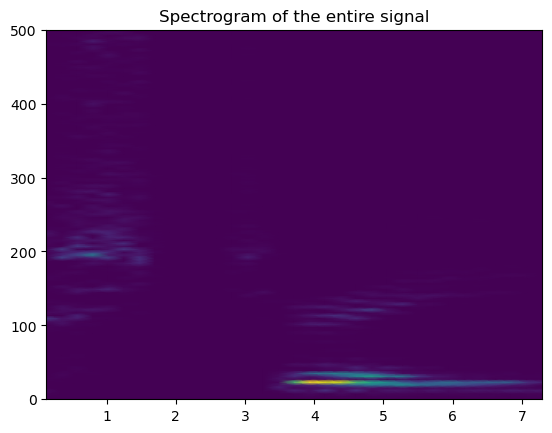

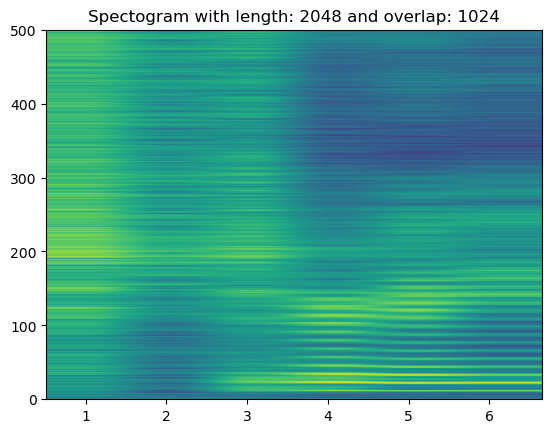

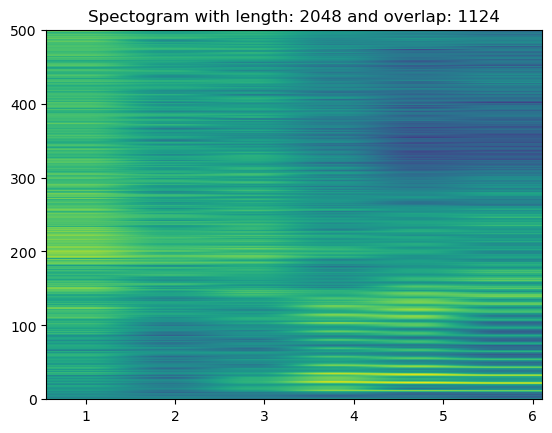

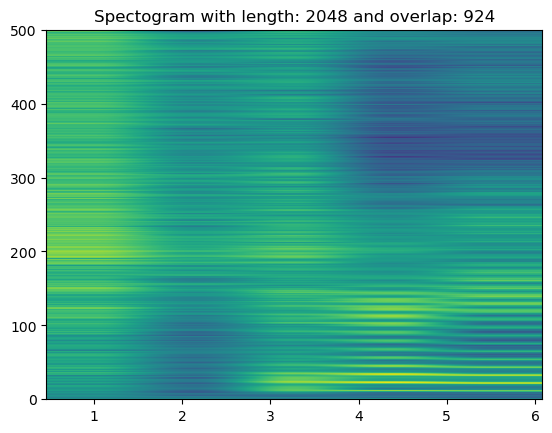

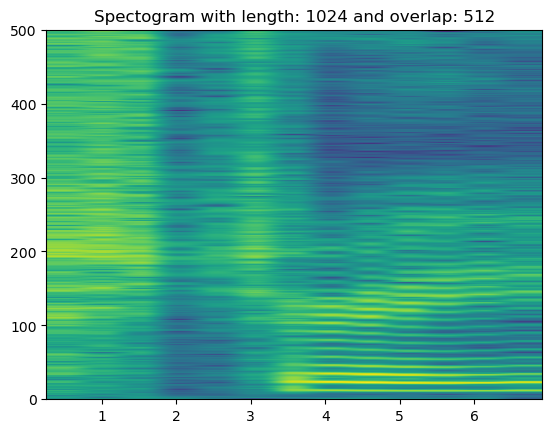

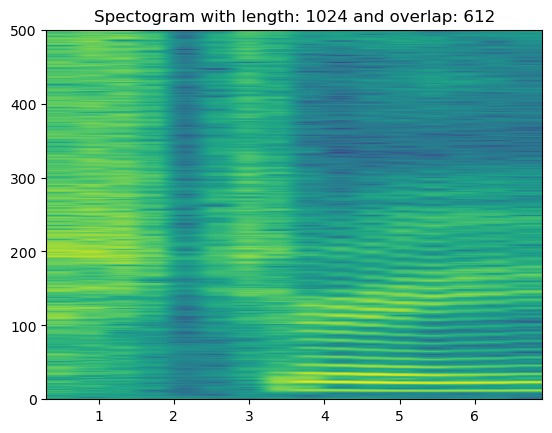

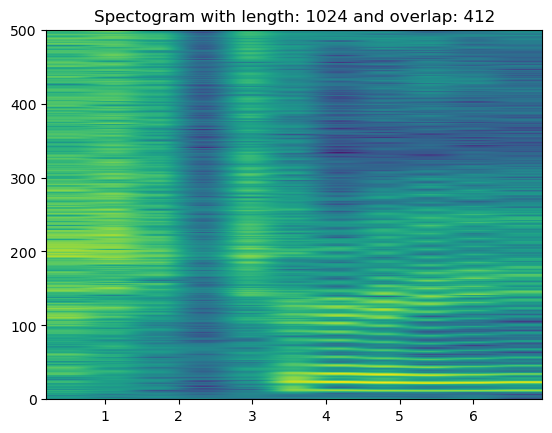

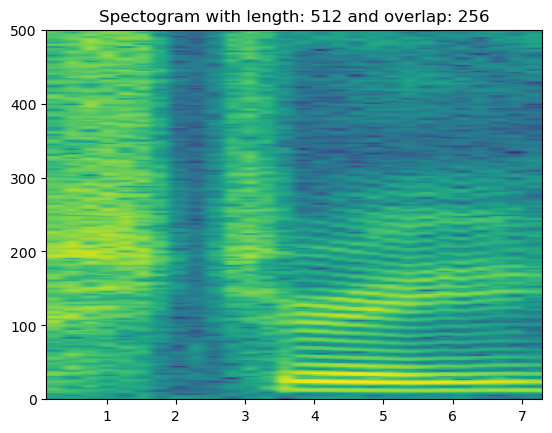

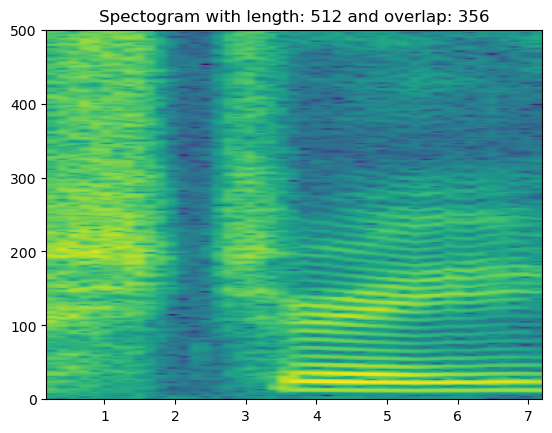

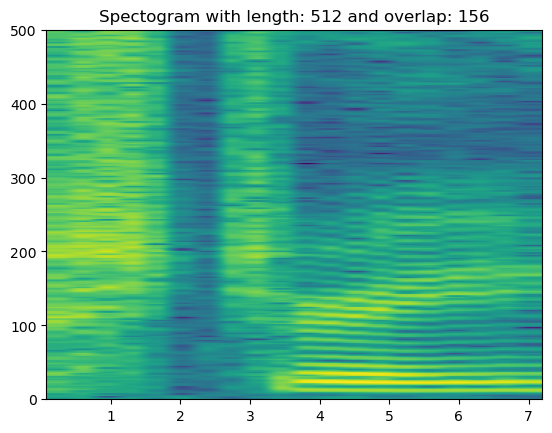

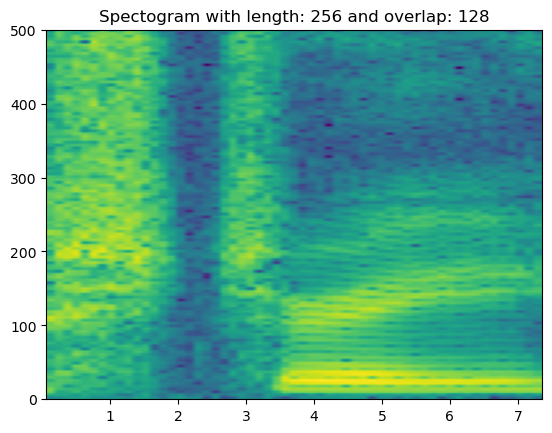

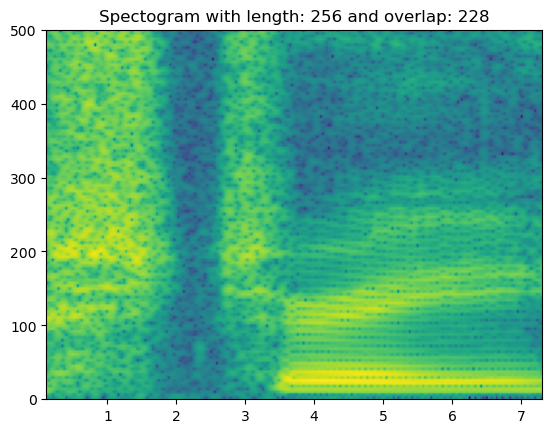

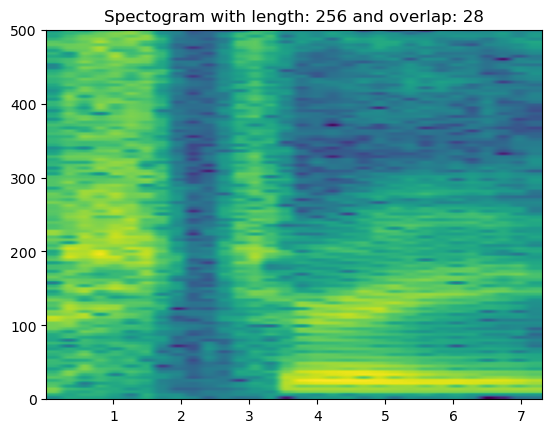

In [8]:
from scipy import signal

f, t, Sxx = signal.spectrogram(x=data, fs=Fs)
plt.title('Spectrogram of the entire signal')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.show()

for win_length in (2048, 1024, 512, 256):
    for overlap in (win_length//2, win_length//2 +100, win_length//2 -100):
        plt.title(f'Spectogram with length: {win_length} and overlap: {overlap}')
        _ = plt.specgram(data,NFFT=win_length,Fs=Fs,noverlap=overlap, scale="dB")
        plt.show()


2d) 
From the spectrogram I can see the plosive /t/. The stop is clearly showing when t=2. There is no energy emitted from the signal which can indicate a stop which is typical for an explosive. Then the signal is just a lot of noise which would correspont to the sound articulated after the stop, which is a typical characteristic for a consonant. From t=0-1,5 the spectrogram is showing a lot of noise which is characteristic for consonants. The /s/ is also a fricative which could also add to the noise. From about t = 3,5 the /r/ and /iy/ is formed. The /r/ being a semi-vowel are showing almost the same characteristic as the vowel /iy/, and the spectrogram is showing that the /r/ "glides" over to the signal /iy/. The last part are mainly showing high energy at three different frequencies. The lowest, between 0 and 50 Hz corresponding to F0, the second, between 100 and 150 Hz. The third corresponds to the second formant and has the lowest energy of all three and is found approximately between 200 and 250 Hz, and even maybe up to 300 Hz. 

### Problem 2
In this problem we look at the cepstrum and deconvolution

(a) Compute and plot the real cepstrum of the vowel from problem 1a).

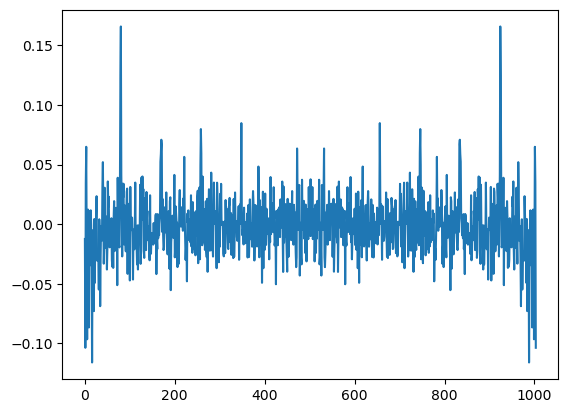

In [6]:
cepstrum = np.fft.ifft(np.log(np.abs(FFT_iy)))
real_cepst = np.real(cepstrum)


plt.plot(real_cepst[10:-10])
plt.show()


(b) Use the cepstrum to compute the fundamental frequency $F_0$. Compare your results with those obtained in problem 1).

2b)
The first sample peak is about 80. Then F0 = Fs/P0 = 16kHz/80 = 200 Hz. 
Using the cepstrum I get that the fundamental frequency is 200Hz. Compared to the results in 1a), which was 184 Hz, the difference is only 16Hz. Since the fundamental frequency calculated in 1b) is very off, the results are incomparable. 

(c) In this subproblem you will use the cepstrum to estimate the spectral envelope
- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from problem 1).

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal mus be symmetric as well.

Hint 2: The FFT of a real, symmtric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.

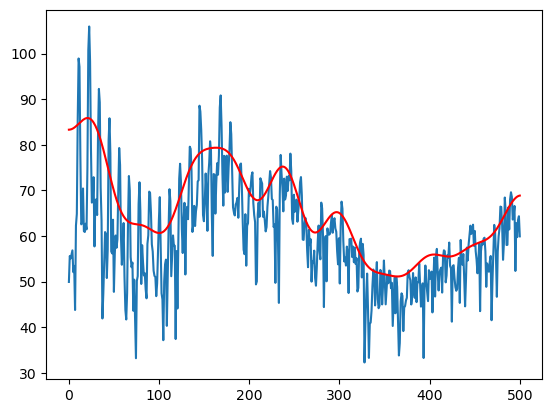

In [7]:
cepst_envelope = real_cepst
cepst_envelope[20:len(cepst_envelope)-20] = 0
spect_envelope = np.abs(np.exp(np.fft.fft(cepst_envelope, n=1024)))
plt.plot(FFT_x, 20*np.log10(np.abs(FFT_window[:N])))
plt.plot(FFT_x, 20*np.log10(spect_envelope[:N]), "r")
plt.show()


1c)
Compared to the results from problem 1, I think the spectral envelope does a good job at finding the formants. And it seems like the method avoids the problem of overfitting. 
